310
230
0.9999999999999991


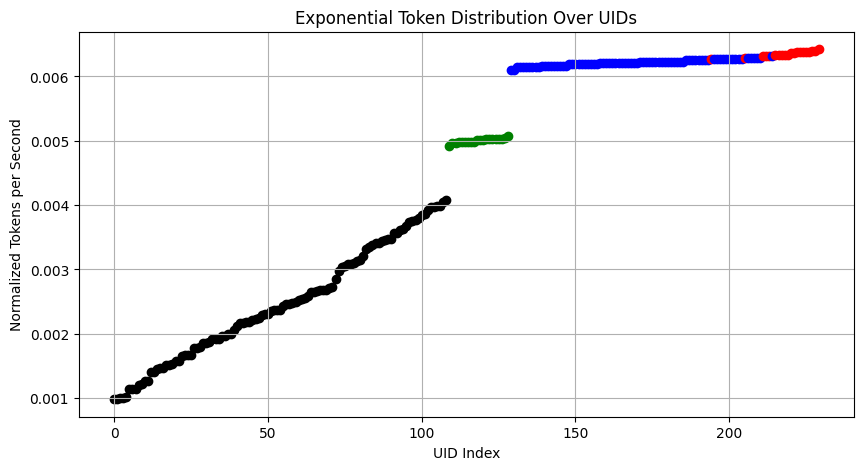

In [68]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_tokens(
        total_uids=40, 
        mean_values=[185, 75, 50],  # List of mean values for different cabal groups
        std_devs=[5, 3, 2],  # List of standard deviations for different cabal groups
        cabal_ratios=[0.15, 0.15, 0.10],  # Ratios of total_uids for each cabal group
        max_tokens=400, 
        min_tokens=50,
        exponential_base=1.04,  # Base for exponential scaling
        num_cabal_uids=None  # List of exact numbers for each cabal group, if specified
    ):
    tokens_per_second = []
    cabal_colors = []

    if num_cabal_uids is None:
        num_cabal_uids = [int(total_uids * ratio) for ratio in cabal_ratios]

    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Define a list of colors for different cabals

    for idx, (mean, std, num_uids) in enumerate(zip(mean_values, std_devs, num_cabal_uids)):
        cabal_tokens = np.random.normal(mean, std, num_uids).astype(int)
        tokens_per_second.extend(cabal_tokens)
        cabal_colors.extend([colors[idx % len(colors)]] * num_uids)

    remaining_uids = total_uids - sum(num_cabal_uids)
    remaining_tokens = [random.randint(min_tokens, max_tokens) for _ in range(remaining_uids)]
    tokens_per_second.extend(remaining_tokens)

    print(sorted(tokens_per_second)[-1])
    print(len(tokens_per_second))

    cabal_colors.extend(['k'] * remaining_uids)  # Use black for remaining UIDs

    # Apply exponential scaling to each uid
    exponential_tokens = [x ** (exponential_base) for i, x in enumerate(tokens_per_second)]

    # Normalize the exponentially scaled tokens so their sum equals one
    total_exponential = sum(exponential_tokens)
    normalized_tokens = [x / total_exponential for x in exponential_tokens]

    # Combine tokens and colors, then sort by tokens
    combined = sorted(zip(normalized_tokens, cabal_colors), key=lambda x: x[0])
    sorted_tokens, sorted_colors = zip(*combined)

    print(sum(sorted_tokens))
    plt.figure(figsize=(10, 5))
    for idx, (token, color) in enumerate(zip(sorted_tokens, sorted_colors)):
        plt.scatter(idx, token, color=color)
    plt.title('Exponential Token Distribution Over UIDs')
    plt.xlabel('UID Index')
    plt.ylabel('Normalized Tokens per Second')
    plt.grid(True)
    plt.show()

# Example usage:
generate_tokens(
    total_uids=230, 
    mean_values=[307, 244, 301], 
    std_devs=[2, 2, 2], 
    num_cabal_uids=[20, 20, 81],
    max_tokens=200,
    min_tokens=50
)